# Classifying voices based on their features

### By: Daniel Youssef

Dataset Source: https://www.kaggle.com/datasets/primaryobjects/voicegender

This dataset consists of several acoustic properties that make up human sounds. In order to classify these voices correctly, three different classification algorithms will be used to train three models, and three evaluation scores will be used to compare the models in order to find the best possible one.

In this dataset, there are 21 features (including the target class). Here is a breakdown of each feature name, which was provided from the data source:

1. meanfreq: mean frequency (in kHz)

2. sd: standard deviation of frequency

3. median: median frequency (in kHz)

4. Q25: first quantile (in kHz)

5. Q75: third quantile (in kHz)

6. IQR: interquantile range (in kHz)

7. skew: skewness

8. kurt: kurtosis

9. sp.ent: spectral entropy

10. sfm: spectral flatness

11. centroid: frequency centroid (see specprop)

12. peakf: peak frequency (frequency with highest energy)

13. meanfun: average of fundamental frequency measured across acoustic signal

14. minfun: minimum fundamental frequency measured across acoustic signal

15. maxfun: maximum fundamental frequency measured across acoustic signal

16. meandom: average of dominant frequency measured across acoustic signal

17. mindom: minimum of dominant frequency measured across acoustic signal

18. maxdom: maximum of dominant frequency measured across acoustic signal

19. dfrange: range of dominant frequency measured across acoustic signal

20. modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

21. label: male or female




important note: After some research into the origins of the dataset, I found out that the duration for each recording is standardized at 20 seconds, and the peak frequency is standardized at zero, which is why these features are not present in the dataset.

For this dataset, these will be the goals of my notebook:

1. Finding out the difference(s) that seperate male voices from female voices

2. Making sure the data is clean enough to not cause any errors or inaccuracies for training and testing

3. Coming up with a machine learning model that has the highest accuracy for classifying different voices

These are the following steps that will be taken:

1. Importing Libraries
2. Data Cleaning
3. Data Visualization
4. Model Training (No Feature Selection)
5. Model Testing (No Feature Selection)
6. Feature Selection
7. Model Training (With Feature Selection)
8. Model Testing (With Feature Selection)
9. Comparison And Analysis of Results
10. Conclusion

### Importing Libraries and reading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("voice.csv")

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.shape

(3168, 21)

### Data Cleaning


First: checking for duplicated values, as well as missing values

In [5]:
df[df.duplicated()]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
298,0.213732,0.057705,0.242573,0.141701,0.257984,0.116283,2.113598,7.890927,0.859712,0.084934,...,0.213732,0.133667,0.028319,0.253968,0.818125,0.132812,4.164062,4.031250,0.229051,male
2403,0.212190,0.043190,0.215153,0.188957,0.245644,0.056687,1.862573,6.109790,0.877669,0.314398,...,0.212190,0.139942,0.047198,0.279070,1.925551,0.023438,15.609375,15.585938,0.121344,female


In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000
mean,0.180886,0.057130,0.185593,0.140440,0.224748,0.084308,3.140895,36.587139,0.895144,0.408348,0.165248,0.180886,0.142811,0.036801,0.258837,0.828868,0.052631,5.044220,4.991589,0.173751
std,0.029916,0.016656,0.036354,0.048687,0.023636,0.042790,4.241768,134.969236,0.044988,0.177476,0.077212,0.029916,0.032314,0.019225,0.030085,0.525009,0.063301,3.517226,3.516072,0.119484
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163650,0.041942,0.169578,0.111086,0.208740,0.042538,1.649353,5.666817,0.861823,0.258126,0.118008,0.163650,0.116990,0.018223,0.253968,0.419640,0.007812,2.070312,2.041016,0.099726
50%,0.184814,0.059162,0.190016,0.140255,0.225668,0.094280,2.197623,8.327893,0.901823,0.396472,0.186530,0.184814,0.140585,0.046110,0.271186,0.765625,0.023438,4.992188,4.945312,0.139357
75%,0.199118,0.067023,0.210588,0.175931,0.243640,0.114168,2.932527,13.649803,0.928717,0.533795,0.221070,0.199118,0.169605,0.047904,0.277457,1.176824,0.070312,7.005859,6.992188,0.209141
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [9]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

### Data Visualization

### 1. Distribution of classes

Target cannot be visualized while it is of type "object", so it will be temporarily converted

In [10]:
df['label'].replace('male','1',inplace = True)
df['label'].replace('female','0',inplace = True)
df.astype({'label': 'float'}).dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label       float64
dtype: object

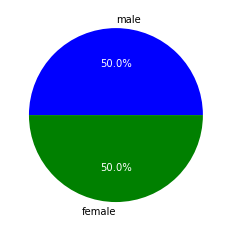

In [11]:
_, _, autotexts = plt.pie(df['label'].value_counts(),colors = ['blue','green'],labels = ['male','female'],autopct= '%1.1f%%')
for autotext in autotexts:
    autotext.set_color('white')

Data is balanced, as both classes are of the same count.

Now, the label will be changed back to its original data type.

In [12]:
df['label'].replace('1','male',inplace = True)
df['label'].replace('0','female',inplace = True)
df.astype({'label': 'object'})

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


#### 2. Outlier Detection

<AxesSubplot:title={'center':'meanfreq'}, xlabel='label'>

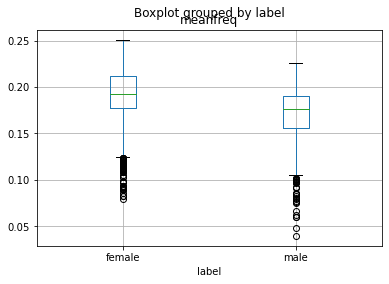

In [13]:
df.boxplot(column = 'meanfreq', by = 'label')

These outliers should not be removed, as the different frequencies of human beings' speech should be expected. Also, the analyzed frequency range of the data source was between 0-280hz, so these figures are not out of place.

<AxesSubplot:title={'center':'meanfun'}, xlabel='label'>

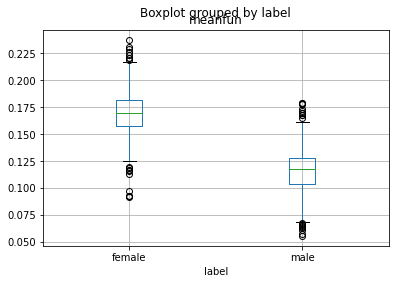

In [14]:
df.boxplot(column = 'meanfun', by = 'label')

Some of these outliers may be removed, as they do not fall in the expected range of fundamental frequency for males and females.

The voiced speech of a typical adult male will have a fundamental frequency
from 85 to 155 Hz, and that of a typical adult female from 165 to 255 Hz.

Source: https://en.wikipedia.org/wiki/Voice_frequency#Fundamental_frequency

However, they will not be dropped for this notebook as certain fundamental frequencies can be lower or higher depending on the age of the speaker.

source: https://www.tandfonline.com/doi/abs/10.3109/00016486909129236?journalCode=ioto20

#### 3. distribution of mean frequencies versus mean fundamental frequencies

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


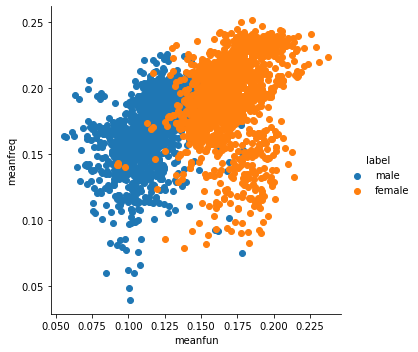

In [15]:
sns.FacetGrid(df, hue="label", size=5).map(plt.scatter, "meanfun", "meanfreq").add_legend()

The data is not linearly seperable, and it has many variations based on the mean fundamental frequency and the mean frequency.

With how these variations are looking, KNN will not enjoy working with this dataset...

<AxesSubplot:xlabel='label', ylabel='meanfreq'>

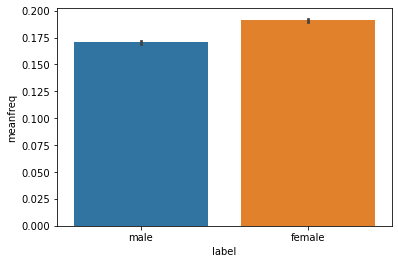

In [16]:
sns.barplot(x = df['label'],y = df['meanfreq'])

As expected, females have a higher mean frequency than males, as women speak with a higher pitch, while men speak with a lower pitch.

### Model Training (No Feature Selection)

Time to start training models!

Three different models will be trained using three different algorithms:

1. Decision Tree

* Good for data with little variations. But, it is more likely to overfit on high number of features, as it will keep creating more complex leaf nodes to try to learn the different variations of the data.

2. K-Nearest Neighbour

* Good for data that is very closely related, as it classifies data based on distance (has no training period). However, it is very sensitive to data with irrelevant features, and it does not pay attention to the relationship between different features. Also, it relies heavily on the value of K being optimized.

3. Logistic Regression

* Good for datasets that are very large and varied. However, it is more likely to overfit on a dataset with a smaller sample size or features, as it makes an assumption that the independent, and dependent variables are linearly seperable, which may not always be the case. 

In [17]:
#splitting features from label
x = df.iloc[:,0:-1]
y = df["label"]
x_train_no_fs, x_test_no_fs, y_train_no_fs, y_test_no_fs = train_test_split(x, y, test_size = 0.3, random_state=42)

### 1. Decision Tree

In [18]:
dtree_no_fs = DecisionTreeClassifier(max_depth = 4,random_state= 42)
dtree_no_fs.fit(x_train_no_fs, y_train_no_fs)
print("Accuracy on training set: {:.3f}".format(dtree_no_fs.score(x_train_no_fs, y_train_no_fs)))
print("Accuracy on test set: {:.3f}".format(dtree_no_fs.score(x_test_no_fs, y_test_no_fs)))

Accuracy on training set: 0.983
Accuracy on test set: 0.972


### 1.1 Decision Tree Learning Curve

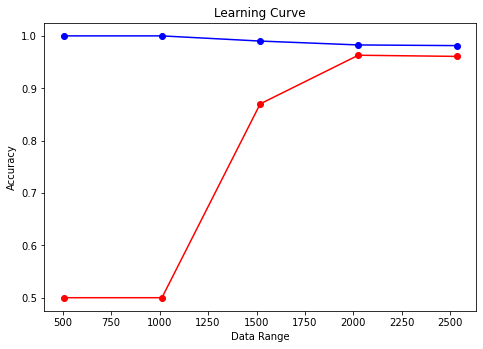

In [19]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=dtree_no_fs,
    X=x,
    y=y,
    cv=5,
    scoring="accuracy",
    train_sizes = [0.2,0.4,0.6,0.8,1]
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes,y= train_scores.mean(axis=1), color='b')
ax.scatter(x=train_sizes,y=test_scores.mean(axis=1), color='r')
ax.plot(train_sizes,train_scores.mean(axis=1), color='b')
ax.plot(train_sizes,test_scores.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

### 2. KNN

Let's find the best value of K.

Text(0, 0.5, 'Testing Accuracy')

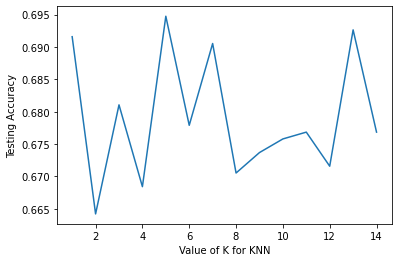

In [20]:
#trying different ranges for k range
k_range = range(1, 15)
scores = []
for k in k_range:
    knn_test = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn_test.fit(x_train_no_fs, y_train_no_fs)
    y_pred_test = knn_test.predict(x_test_no_fs)
    scores.append(metrics.accuracy_score(y_test_no_fs, y_pred_test))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

The best value of K is 5.

In [21]:
knn_no_fs = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_no_fs.fit(x_train_no_fs, y_train_no_fs)
print("Accuracy on test set: {:.3f}".format(knn_no_fs.score(x_test_no_fs, y_test_no_fs)))

Accuracy on test set: 0.695


### 2.1 KNN Learning Curve

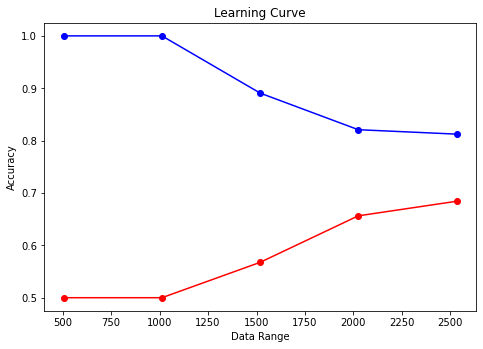

In [22]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn_no_fs,
    X=x,
    y=y,
    cv=5,
    scoring="accuracy",
    train_sizes = [0.2,0.4,0.6,0.8,1],
    n_jobs = -1
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes,y= train_scores.mean(axis=1), color='b')
ax.scatter(x=train_sizes,y=test_scores.mean(axis=1), color='r')
ax.plot(train_sizes,train_scores.mean(axis=1), color='b')
ax.plot(train_sizes,test_scores.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

### 3. Logistic Regression

In [23]:
lrmodel_no_fs = LogisticRegression(C = 5,solver='lbfgs', max_iter=1000)
lrmodel_no_fs = lrmodel_no_fs.fit(x_train_no_fs, y_train_no_fs)

lrmodel_no_fs.score(x_test_no_fs, y_test_no_fs)

0.9547368421052631

### 3.1 Logistic Regression Learning Curve

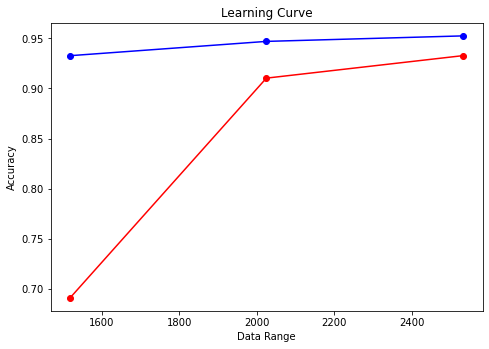

In [24]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=lrmodel_no_fs,
    X=x,
    y=y,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes = [0.2,0.4,0.6,0.8,1],
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes,y= train_scores.mean(axis=1), color='b')
ax.scatter(x=train_sizes,y=test_scores.mean(axis=1), color='r')
ax.plot(train_sizes,train_scores.mean(axis=1), color='b')
ax.plot(train_sizes,test_scores.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

### Model Testing (No Feature Selection)

Time to start testing models!

The three models will be assessed based on three evaluation methods:

1. Accuracy

* Percentage of correctly classified labels divided by total number of labels

2. Confusion Matrix

* A complete breakdown of which labesl were classified correctly, or incorrectly by showing which errors were type 1 or type 2 errors. It works well with imbalanced data, and with balanced data that has many different variations amongst its features.

3. Classification Report

* A report with a diverse list of evaluations for the model, such as percision, F1-score, support score, and more.

### 1. Decision Tree

#### 1.1 Decision Tree Accuracy

In [25]:
print("Accuracy on test set: {:.3f}".format(dtree_no_fs.score(x_test_no_fs, y_test_no_fs)))

Accuracy on test set: 0.972


#### 1.2 Decision Tree Confusion Matrix

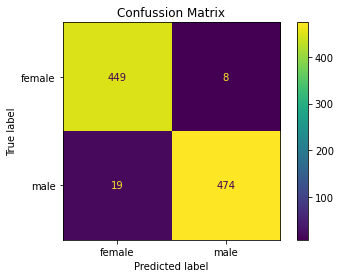

In [26]:
plot_confusion_matrix(dtree_no_fs, x_test_no_fs, y_test_no_fs)  
plt.title('Confussion Matrix')
plt.show()

#### 1.3 Decision Tree Classification Report

In [27]:
y_pred_dt_no_fs = dtree_no_fs.predict(x_test_no_fs)
cf_rep = classification_report(y_test_no_fs, y_pred_dt_no_fs,
                            target_names=["female", "male"])

print(cf_rep)

              precision    recall  f1-score   support

      female       0.96      0.98      0.97       457
        male       0.98      0.96      0.97       493

    accuracy                           0.97       950
   macro avg       0.97      0.97      0.97       950
weighted avg       0.97      0.97      0.97       950



### 2. KNN

2.1 KNN Accuracy

In [28]:
print("Accuracy on test set: {:.3f}".format(knn_no_fs.score(x_test_no_fs, y_test_no_fs)))

Accuracy on test set: 0.695


#### 2.2 KNN Confusion Matrix

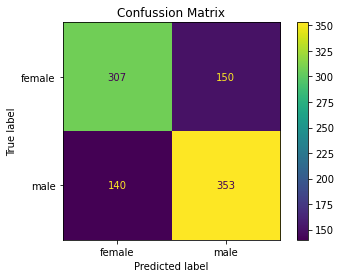

In [29]:
plot_confusion_matrix(knn_no_fs, x_test_no_fs, y_test_no_fs)  
plt.title('Confussion Matrix')
plt.show()

#### 2.3 KNN Classification Report

In [30]:
y_pred_knn_no_fs = knn_no_fs.predict(x_test_no_fs)
cf_rep = classification_report(y_test_no_fs, y_pred_knn_no_fs,
                            target_names=["female", "male"])

print(cf_rep)

              precision    recall  f1-score   support

      female       0.69      0.67      0.68       457
        male       0.70      0.72      0.71       493

    accuracy                           0.69       950
   macro avg       0.69      0.69      0.69       950
weighted avg       0.69      0.69      0.69       950



### 3. Logistic Regression

#### 3.1 Logistic Regression Accuracy

In [31]:
print("Accuracy on test set: {:.3f}".format(lrmodel_no_fs.score(x_test_no_fs, y_test_no_fs)))

Accuracy on test set: 0.955


#### 3.2 Logistic Regression Confusion Matrix

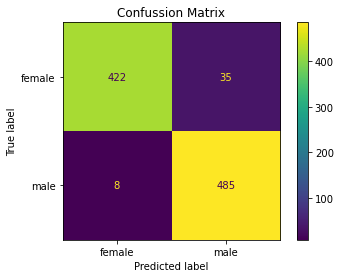

In [32]:
plot_confusion_matrix(lrmodel_no_fs, x_test_no_fs, y_test_no_fs)  
plt.title('Confussion Matrix')
plt.show()

#### 3.3 Logistic Regression Classification Report

In [33]:
y_pred_lr_no_fs = lrmodel_no_fs.predict(x_test_no_fs)
cf_rep = classification_report(y_test_no_fs, y_pred_lr_no_fs,
                            target_names=["female", "male"])

print(cf_rep)

              precision    recall  f1-score   support

      female       0.98      0.92      0.95       457
        male       0.93      0.98      0.96       493

    accuracy                           0.95       950
   macro avg       0.96      0.95      0.95       950
weighted avg       0.96      0.95      0.95       950



### Feature Selection

In order to begin selecting the most relevant features, first it is important to decide on which feature selection method to use.

There are three feature selection methods:

1. Filter Methods

Filter methods measure, and compare the correlation of all features, and the ones with high correlation to each other are considered "redundant" as they do not improve the ability of the model to train. In a sense, filter methods attempt to maximize the model's ability to separate classes and classify accordingly. Also, Filter methods work independently of machine learning algorithms.

2. Wrapper Methods

Wrapper methods evaluate features based on criteria related to the machine learning algorithm. Moreover, feature groups are evaluated based on their predictive accuracy with respect to the test data. To explain further, different feature groups are selected for training and testing on the model, and then their accuracy is evaluated. In the end, the feature group with the highest accuracy is the list of chosen features.

3. Embedded Methods

Embedded methods work similarly to the wrapper methods, from the perspective that features are selected based on the machine learning algorithm. However, they differ in the fact that the features are selected during the learning/training phase. Since the data is not required to be split into train-test splits, the method takes advantage of the wrapper method's ability to evaluate feature groups, while also being faster as it does not re-train the same features in different groups, but instead takes the features that perform well in the training phase.

Some important notes regarding each method:

* Filter methods pick large number of features, and therefore may be biased towards certain models.

* Wrapper methods do not take into consideration the correlation between the features in the feature groups, therefore it might skip important features in favour of finding two features that have high accuracy together.

* Although they are faster than wrapper methods, embedded methods will take more processing time than filter methods due to the feature groups being evaluated during training. 

Overall, the filter method seems to be the best method for this particular dataset, as the number of features is already low, and the correlation of features together is important to consider when all the features are related (statistical measures of frequencies).

An important note to mention:

It is very important to only use the training set in correlation matrices. Because, if the whole dataset is used in the correlation matrix, this means that the training data is mixed with testing data. This would result in the model overfitting the data, because the training set is data it has already seen before.

In [34]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

<AxesSubplot:>

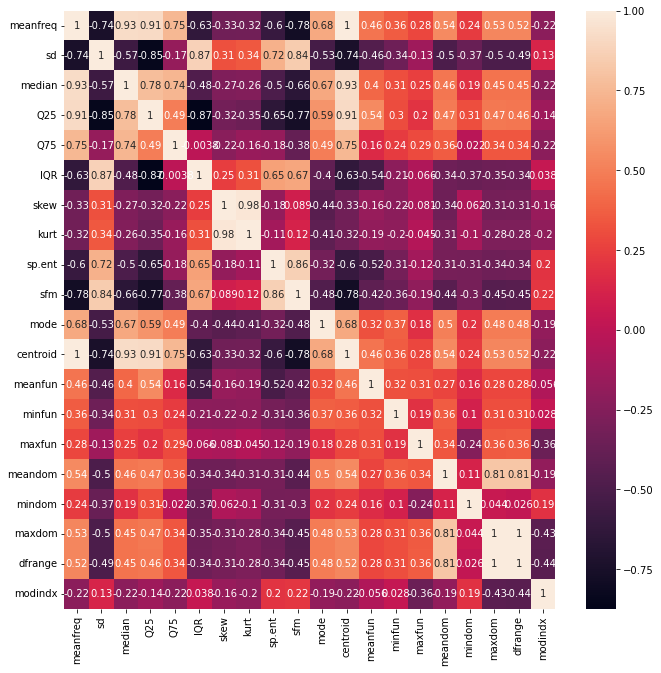

In [35]:
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,annot=True)

Since it is hard to eye-ball the highly correlated features, it is better to use a function with a threshold, instead.

In [36]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [37]:
correlated_features = correlation(x_train, 0.8)
correlated_features

{'IQR', 'Q25', 'centroid', 'dfrange', 'kurt', 'maxdom', 'median', 'sfm'}

In [38]:
x_train.drop(labels = correlated_features,axis = 1,inplace = True)
x_test.drop(labels = correlated_features,axis = 1, inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Model Training (With Feature Selection)

Now that the most important features have been selected, it is time to train the models again, and then test them

### 1. Decision Tree

In [39]:
dtree = DecisionTreeClassifier(max_depth = 4, random_state= 42)
dtree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(x_test, y_test)))

Accuracy on training set: 0.975
Accuracy on test set: 0.959


### 1.1 Decision Tree Learning Curve

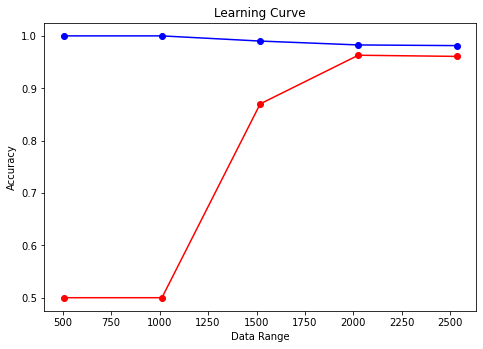

In [40]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=dtree,
    X=x,
    y=y,
    cv=5,
    scoring="accuracy",
    train_sizes = [0.2,0.4,0.6,0.8,1]
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes,y= train_scores.mean(axis=1), color='b')
ax.scatter(x=train_sizes,y=test_scores.mean(axis=1), color='r')
ax.plot(train_sizes,train_scores.mean(axis=1), color='b')
ax.plot(train_sizes,test_scores.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

### 2. KNN

Just like before, I must find the most optimal version of K

Text(0, 0.5, 'Testing Accuracy')

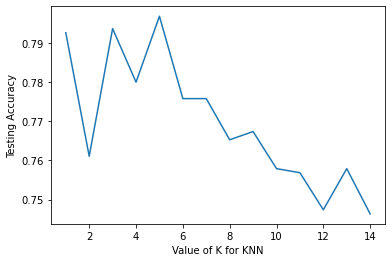

In [41]:
#trying different ranges for k range

k_range = range(1, 15)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

The best K value is 5

In [42]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
print("Accuracy on test set: {:.3f}".format(knn.score(x_test, y_test)))

Accuracy on test set: 0.797


### 2.1 KNN Learning Curve

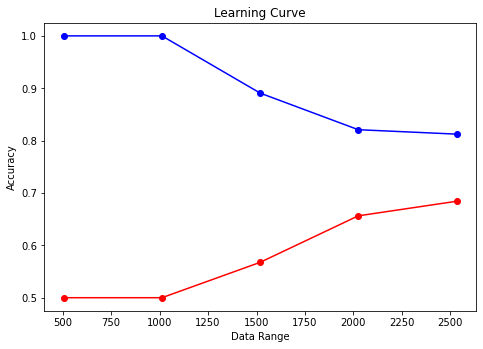

In [43]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=x,
    y=y,
    cv=5,
    scoring="accuracy",
    train_sizes = [0.2,0.4,0.6,0.8,1],
    n_jobs = -1
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes,y= train_scores.mean(axis=1), color='b')
ax.scatter(x=train_sizes,y=test_scores.mean(axis=1), color='r')
ax.plot(train_sizes,train_scores.mean(axis=1), color='b')
ax.plot(train_sizes,test_scores.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

### 3. Logistic Regression 

In [44]:
lrmodel = LogisticRegression(C = 5,solver='lbfgs', max_iter=1000)
lrmodel = lrmodel.fit(x_train, y_train)

lrmodel.score(x_test, y_test)

0.9578947368421052

### 3.1 Logistic Regression Learning Curve


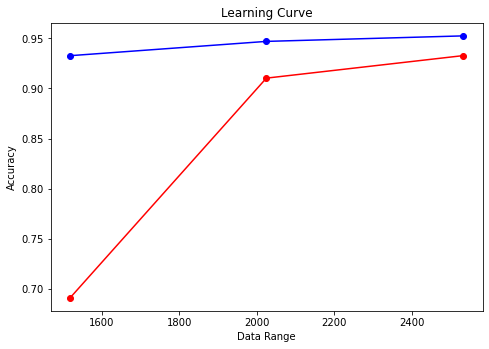

In [45]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=lrmodel,
    X=x,
    y=y,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes = [0.2,0.4,0.6,0.8,1],
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes,y= train_scores.mean(axis=1), color='b')
ax.scatter(x=train_sizes,y=test_scores.mean(axis=1), color='r')
ax.plot(train_sizes,train_scores.mean(axis=1), color='b')
ax.plot(train_sizes,test_scores.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

### Model Testing (With Feature Selection)

Let's see if these models performed better with feature selection!

### 1. Decision Trees

#### 1.1 Decision Tree Accuracy

In [46]:
print("Accuracy on test set: {:.3f}".format(dtree.score(x_test, y_test)))

Accuracy on test set: 0.959


#### 1.2 Decision Tree Confusion Matrix

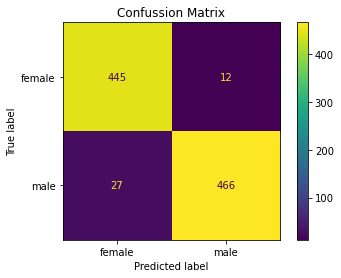

In [47]:
plot_confusion_matrix(dtree, x_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

#### 1.3 Decision Tree Classification Report

In [48]:
y_pred_dt = dtree.predict(x_test)
cf_rep = classification_report(y_test, y_pred_dt,
                            target_names=["female", "male"])

print(cf_rep)

              precision    recall  f1-score   support

      female       0.94      0.97      0.96       457
        male       0.97      0.95      0.96       493

    accuracy                           0.96       950
   macro avg       0.96      0.96      0.96       950
weighted avg       0.96      0.96      0.96       950



### KNN

#### 2.1 KNN Accuracy

In [49]:
print("Accuracy on test set: {:.3f}".format(knn.score(x_test, y_test)))

Accuracy on test set: 0.797


#### 2.2 KNN Confusion Matrix

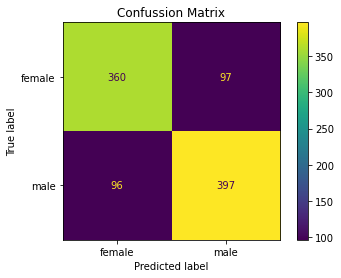

In [50]:
plot_confusion_matrix(knn, x_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

#### 2.3 KNN Classification Report

In [51]:
y_pred_knn = knn.predict(x_test)
cf_rep = classification_report(y_test, y_pred_knn,
                            target_names=["female", "male"])

print(cf_rep)

              precision    recall  f1-score   support

      female       0.79      0.79      0.79       457
        male       0.80      0.81      0.80       493

    accuracy                           0.80       950
   macro avg       0.80      0.80      0.80       950
weighted avg       0.80      0.80      0.80       950



### Logistic Regression

#### 3.1 Logistic Regression Accuracy

In [52]:
print ("Accuracy :", metrics.accuracy_score(y_test, lrmodel.predict(x_test)))

Accuracy : 0.9578947368421052


#### 3.2 Logistic Regression Confusion Matrix

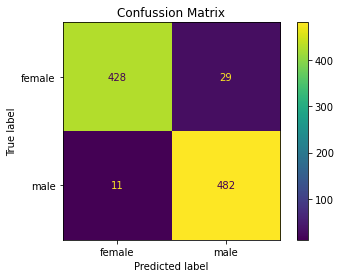

In [53]:
plot_confusion_matrix(lrmodel, x_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

#### 3.3 Logistic Regression Classification Report

In [54]:
y_pred_lr = lrmodel.predict(x_test)
cf_rep = classification_report(y_test, y_pred_lr,
                            target_names=["female", "male"])

print(cf_rep)

              precision    recall  f1-score   support

      female       0.97      0.94      0.96       457
        male       0.94      0.98      0.96       493

    accuracy                           0.96       950
   macro avg       0.96      0.96      0.96       950
weighted avg       0.96      0.96      0.96       950



### Comparison And Analysis of Results

### 1. Decision Trees

#### 1.1 Decision Tree With No Feature Selection

Accuracy: 97.2%

Confusion Matrix:

TP:445 FP:12

FN:24 TN:469

Classification Report:


                  precision    recall  f1-score   support

          female       0.95      0.97      0.96       457
            male       0.98      0.95      0.96       493

        accuracy                           0.96       950
       macro avg       0.96      0.96      0.96       950
    weighted avg       0.96      0.96      0.96       950

#### 1.2 Decision Tree Feature Selection

Accuracy: 95.9%

Confusion Matrix:

TP:440 FP:17

FN:15 TN:478


Classification Report:

                  precision    recall  f1-score   support

          female       0.97      0.96      0.96       457
            male       0.97      0.97      0.97       493

        accuracy                           0.97       950
       macro avg       0.97      0.97      0.97       950
    weighted avg       0.97      0.97      0.97       950

There was a 1% increase in terms of accuracy before FS was applied.

The Confusion Matrix for the model with FS was better at identifying True Negatives.

The Classification Reports are almost identical for the two models.

### 2. KNN

#### 2.1 KNN With No Feature Selection

Accuracy: 69.5%

Confusion Matrix:

TP:307 FP:150

FN:140 TN:353

Classification Report:

                  precision    recall  f1-score   support

          female       0.69      0.67      0.68       457
            male       0.70      0.72      0.71       493

        accuracy                           0.69       950
       macro avg       0.69      0.69      0.69       950
    weighted avg       0.69      0.69      0.69       950

#### 2.2 KNN With Feature Selection

Accuracy: 79.7%

Confusion Matrix:

TP:360 FP:97

FN:96 TN:397  

Classification Report:

                  precision    recall  f1-score   support

          female       0.79      0.79      0.79       457
            male       0.80      0.81      0.80       493

        accuracy                           0.80       950
       macro avg       0.80      0.80      0.80       950
    weighted avg       0.80      0.80      0.80       950

The accuracy for KNNs went up by 10.2% after FS. However, it is difficult to compare KNN models as the value of K is the main driver of accuracy for this particular algorithm.

The Confusion Matrix for the model with FS was able to classify more TPs and TNs, which classifying less FPs and FNs. So overall, the confusion matrix was better with FS.

In the Classification Reports, the support values stayed the same. However, the f1-score, recall score, and percision score were higher for the model with FS.

### 3. Logistic Regression

#### 3.1 Logistic Regression With No Feature Selection

Accuracy: 95.5%

Confusion Matrix:

TP:422 FP:35

FN:8 TN:485

Classification Report:

                  precision    recall  f1-score   support

          female       0.98      0.92      0.95       457
            male       0.93      0.98      0.96       493

        accuracy                           0.95       950
       macro avg       0.96      0.95      0.95       950
    weighted avg       0.96      0.95      0.95       950

#### 3.2 Logistic Regression With Feature Selection

Accuracy: 95.7%

Confusion Matrix:

TP:428 FP:29

FN:11 TN:482

Classification Report:

                  precision    recall  f1-score   support

          female       0.97      0.94      0.96       457
            male       0.94      0.98      0.96       493

        accuracy                           0.96       950
       macro avg       0.96      0.96      0.96       950
    weighted avg       0.96      0.96      0.96       950

Much like the Decision Tree models, the accuracies are almost identical.

The Confusion Matrix had small differences.

In the Classification Reports were almost identical for the two models.

#### 4. Important Notes, and Limitations

It is important to make note of these observations and limitations:

1. Only one feature selection method (filtering) was used, and one of the disadvantages of using this method, is that it does not consider the relationships that certain features may have with other ones. Therefore, the method may remove some features that depend on each other. Also, the method does not take into consideration the features' interaction with the classifier, and may therefore work better with some algorithms than others.


2. The mean fundamental frequency for the dataset did not have its outliers removed, as I had an assumption set for the data that these outliers are important, and they may be an indication of a diverse age range for the speakers.


3. Only three algorithms were tested. Whereas some other algorithms that work better with many features (support vector machines), or algorithms that consider multiple decision trees (random forest) could work better for this particular problem.


4. KNN performed better with feature selection, whereas decision tree, and logistic regression stayed the same after feature selection. Also, decision tree, and logistic regression were more accurate in both cases, than KNN. This leads me to believe that a different feature selection method could have improved the KNN's performance more. However, without feature selection, the KNN achieved the lowest accuracy out of all the models. This leads to believe that the KNN is too error-prone, even with feature selection, and that the K value is more impactful for optimizing a KNN model.


5. Decision Tree, with and without feature selection, had the highest two accuracies out of all the models. Although decision trees are more sensitive to small differences in data, it was able to reach a high accuracy, as the max depth parameter was limited to four, therefore allowing the tree to create many leaf nodes to classify more accurately (max depth was chosen based on trial and error).

### Conclusion


Based on the results of the models, and my analysis:

* Removing outliers for mean frequencies and mean fundamental frequencies can produce less accurate results, as these values rely on a multitude of factors, which cannot be measured with the current feature set.

* Decision Tree was the best algorithm for this problem.

* KNN may have performance on a different feature selection method.

* It is crucial to compare models before and after feature selection, as some irrelevant features can cause some models to perform worse. 